<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error 
import sklearn.datasets as skd

# regressor

In [8]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv')
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
raw.shape

(21613, 21)

In [11]:
raw['date'] = pd.to_datetime(raw['date'])
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
x = raw[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = raw['price']
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [24]:
x['yr_built'] = 2022 - x['yr_built']
x['yr_renovated'] = [2022 - a if a != 0 else 0 for a in x['yr_renovated']]
x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,67,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,71,31,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,89,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,57,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,35,0,47.6168,-122.045,1800,7503


In [28]:
x_ = pd.get_dummies(x, columns = ['waterfront', 'view', 'condition', 'grade'])

In [30]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [32]:
fit_lg = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [33]:
pred_lg = fit_lg.predict(x_te)
pred_rf = fit_rf.predict(x_te)

In [35]:
mean_squared_error(y_te, pred_lg), mean_squared_error(y_te, pred_rf)

(36274943327.36766, 16744580276.622585)

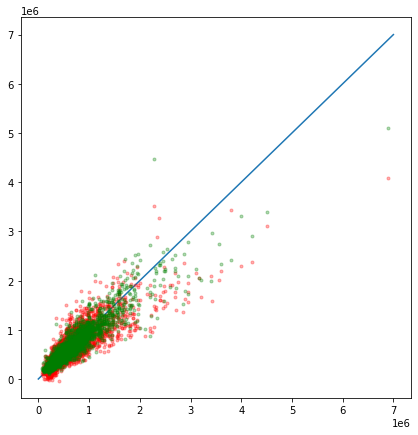

In [39]:
plt.figure(figsize = [7,7])
plt.plot([0,7000000], [0, 7000000])
plt.plot(y_te, pred_lg, '.', color = 'red', alpha = .3)
plt.plot(y_te, pred_rf, '.', color = 'green', alpha = .3)

# customer analysis

In [40]:
os.listdir()

['.config',
 'shops.csv',
 'rfm_test.csv',
 'sample_submission.csv',
 'items.csv',
 'retail_data_response.csv',
 'online_retail_II.xlsx',
 '.Rhistory',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_train.csv',
 'item_categories.csv',
 'test.csv',
 'ecommerce-data.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [44]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()


,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [45]:
df.columns = df.iloc[0]
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [51]:
df = df.drop([0], axis = 0)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [53]:
df = df[df['order_status'] == 'Approved']
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [55]:
df['date'] = df['transaction_date'].to_numpy().astype('datetime64[D]')
df['month'] = df['transaction_date'].to_numpy().astype('datetime64[M]')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date,month
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2017-02-25,2017-02-01
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,2017-05-21,2017-05-01
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,2017-10-16,2017-10-01
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,2017-08-31,2017-08-01
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,2017-10-01,2017-10-01


In [59]:
df = df[['transaction_id','date', 'month','list_price']].rename(columns = {'transaction_id':'id', 'list_price':'rev'})
df.head()

,id,date,month,rev
1,1,2017-02-25,2017-02-01,71.49
2,2,2017-05-21,2017-05-01,2091.47
3,3,2017-10-16,2017-10-01,1793.43
4,4,2017-08-31,2017-08-01,1198.46
5,5,2017-10-01,2017-10-01,1765.3


In [60]:
df.shape

(19821, 4)

In [63]:
df = df.sort_values(['id', 'date'], ascending = [1,0])
df.head()

,id,date,month,rev
1,1,2017-02-25,2017-02-01,71.49
2,2,2017-05-21,2017-05-01,2091.47
3,3,2017-10-16,2017-10-01,1793.43
4,4,2017-08-31,2017-08-01,1198.46
5,5,2017-10-01,2017-10-01,1765.3


In [88]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev' : 'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money')
info_m = info_m.sort_values(['id', 'month'], ascending = [1, 0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,1,0.00
1,2,0.00
2,3,1793.43
3,4,0.00
4,5,1765.30


In [89]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev' : 'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq')
info_f = info_f.sort_values(['id', 'month'], ascending = [1, 0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,1,0.0
1,2,0.0
2,3,1.0
3,4,0.0
4,5,1.0


In [78]:
date_now = datetime(2017,12,31)
date_now

datetime.datetime(2017, 12, 31, 0, 0)

In [90]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).reset_index().rename(columns = {'date':'recency'})
info_r.head()

,id,recency
0,1,309
1,2,224
2,3,76
3,4,122
4,5,91


In [91]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,1,309,0.0,0.00
1,2,224,0.0,0.00
2,3,76,1.0,1793.43
3,4,122,0.0,0.00
4,5,91,1.0,1765.30


In [98]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,1,309,0.0,0.00,5,5,5
1,2,224,0.0,0.00,4,5,5
2,3,76,1.0,1793.43,2,2,1
3,4,122,0.0,0.00,2,5,5
4,5,91,1.0,1765.30,2,2,1


In [100]:
info = info.assign(rf = info['r'].astype(str) + info['m'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,1,309,0.0,0.00,5,5,5,55
1,2,224,0.0,0.00,4,5,5,45
2,3,76,1.0,1793.43,2,2,1,21
3,4,122,0.0,0.00,2,5,5,25
4,5,91,1.0,1765.30,2,2,1,21


In [101]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [102]:
info = info.assign(rf = info['rf'].replace(seg_map, regex = True))

,id,recency,freq,money,r,f,m,rf
0,1,309,0.0,0.00,5,5,5,champions
1,2,224,0.0,0.00,4,5,5,loyal_customers
2,3,76,1.0,1793.43,2,2,1,hibernating
3,4,122,0.0,0.00,2,5,5,cant_loose
4,5,91,1.0,1765.30,2,2,1,hibernating
...,...,...,...,...,...,...,...,...
19816,19996,190,0.0,0.00,3,2,2,about_to_sleep
19817,19997,52,1.0,416.98,1,1,2,hibernating
19818,19998,261,0.0,0.00,4,2,2,potential_loyalists
19819,19999,181,0.0,0.00,3,2,2,about_to_sleep


In [104]:
cnt = info.groupby(['rf', 'm'])['id'].count().reset_index()
cnt.head()

,rf,m,id
0,11,5,0
1,11,4,0
2,11,3,0
3,11,2,0
4,11,1,3116


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


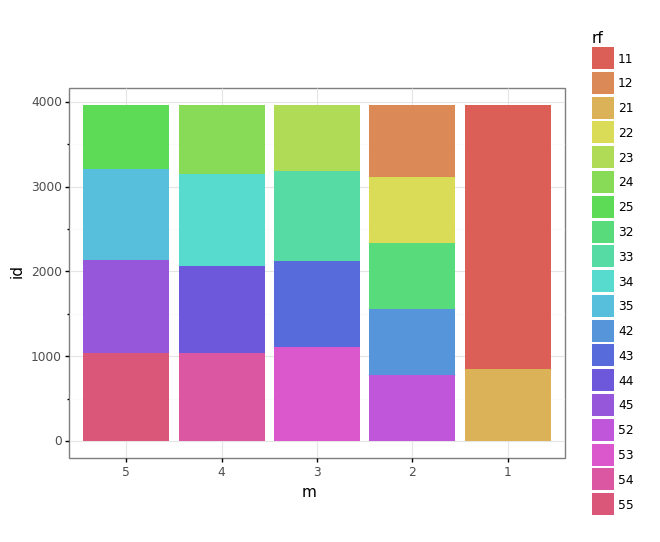

<ggplot: (8779072851509)>

In [105]:
(
    ggplot(cnt, aes('m', 'id', fill = 'rf')) +
    gg.geom_col() +
    gg.theme_bw()
)